In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [76]:
fisheriris_mat = io.loadmat(os.path.join('..','DATA','fisheriris.mat'))
meas = fisheriris_mat['meas']

x1 = meas[:50,:] # setosa
x2 = meas[50:100,:] # versicolor
x3 = meas[100:,:] # virginica

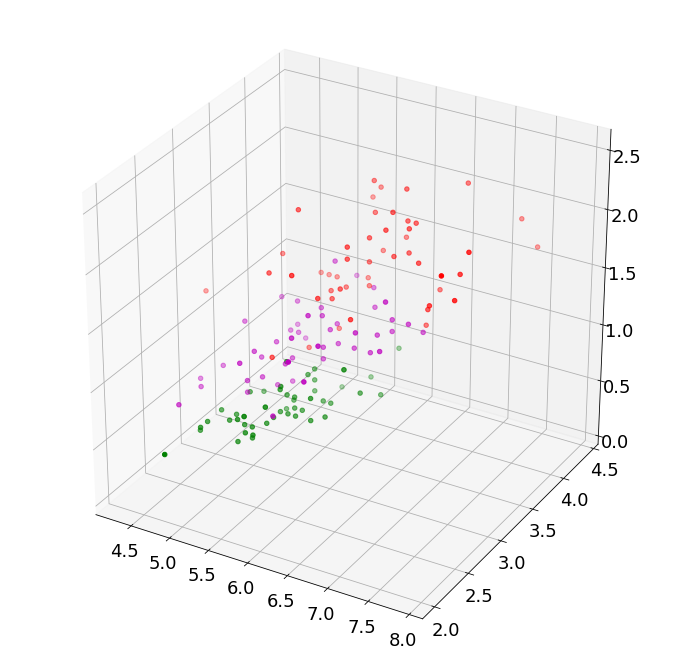

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[:,0], x1[:,1], x1[:,3], c='g', marker='o')
ax.scatter(x2[:,0], x2[:,1], x2[:,3], c='m', marker='o')
ax.scatter(x3[:,0], x3[:,1], x3[:,3], c='r', marker='o')

plt.show()

In [57]:
dogdata_mat = io.loadmat(os.path.join('..','DATA','dogData.mat'))
catdata_mat = io.loadmat(os.path.join('..','DATA','catData.mat'))

dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog,cat),axis=1)
CD2 = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
u2,s2,vT2 = np.linalg.svd(CD2-np.mean(CD2),full_matrices=0)

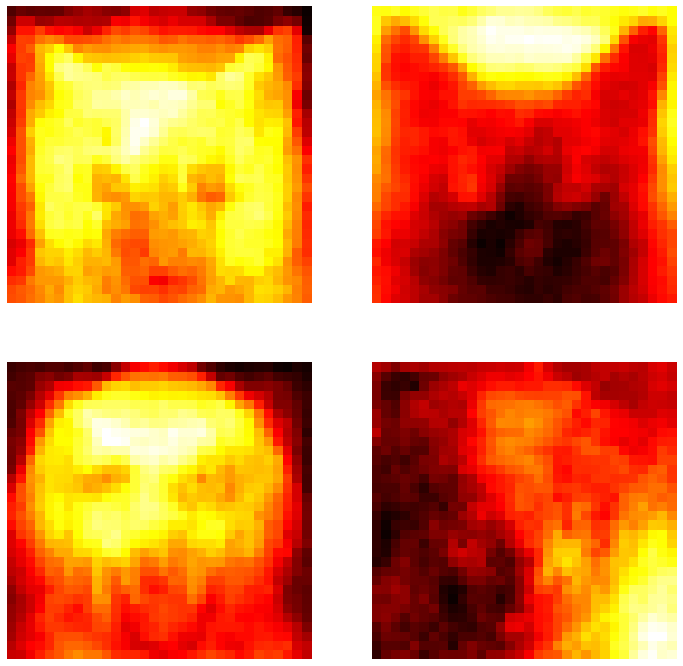

In [63]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(64,64)))
    U2 = U[::2,::2]
    axs[j].pcolor(np.rot90(U2),cmap='hot')
    axs[j].axis('off')

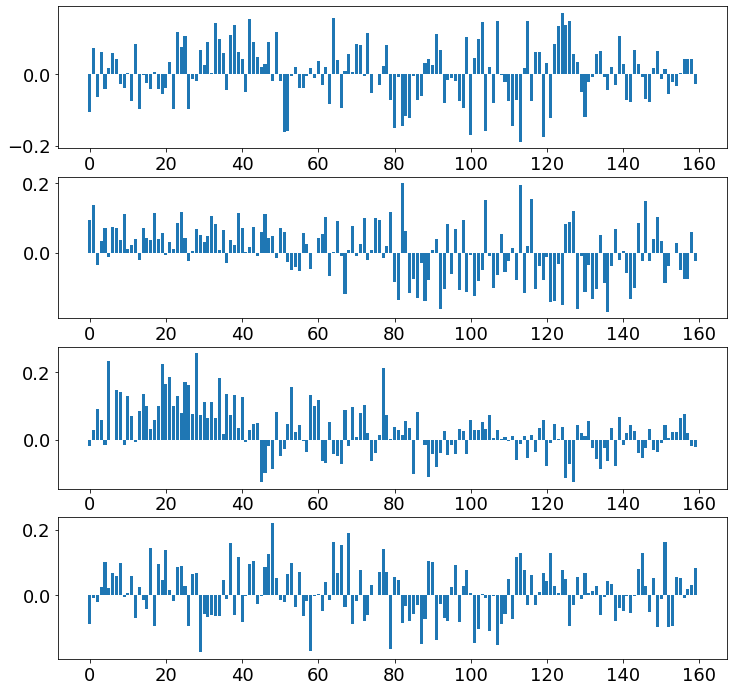

In [30]:
fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s)),vT[j,:])

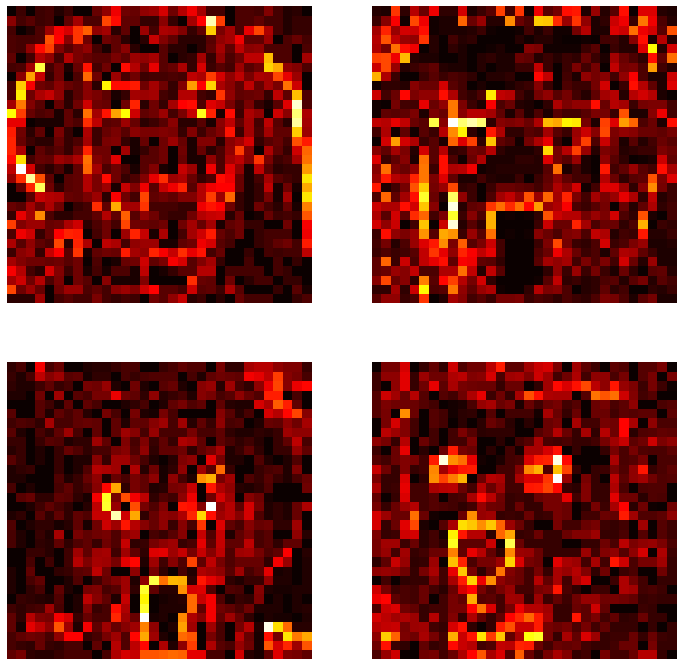

In [62]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    Xd = np.flipud(np.reshape(dog_wave[:,j],(32,32)))
    axs[j].pcolor(np.rot90(Xd),cmap='hot')
    axs[j].axis('off')

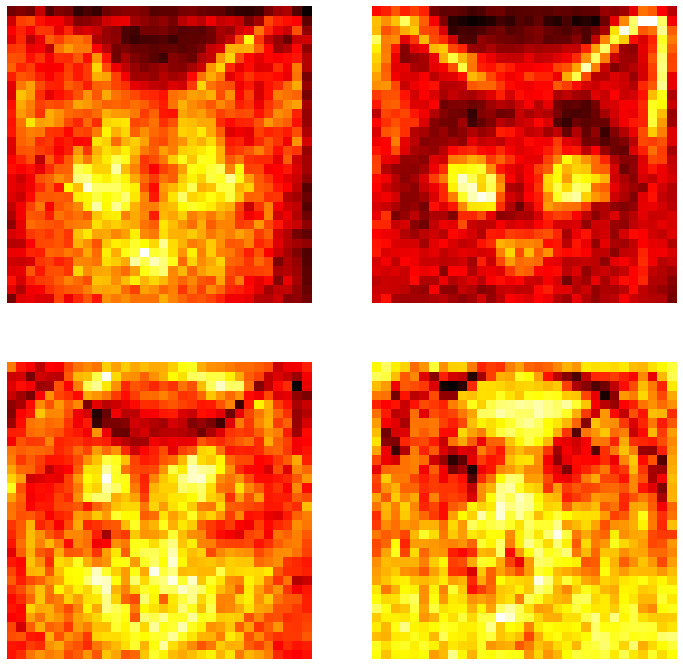

In [64]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U3 = np.flipud(np.reshape(u2[:,j],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')

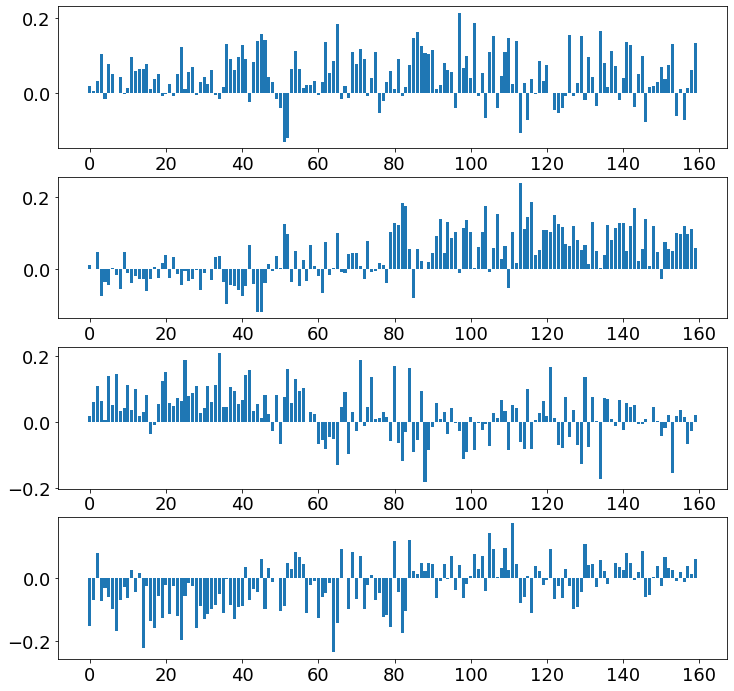

In [65]:
fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
for j in range(4):
    axs[j].bar(range(len(s2)),vT2[j,:])

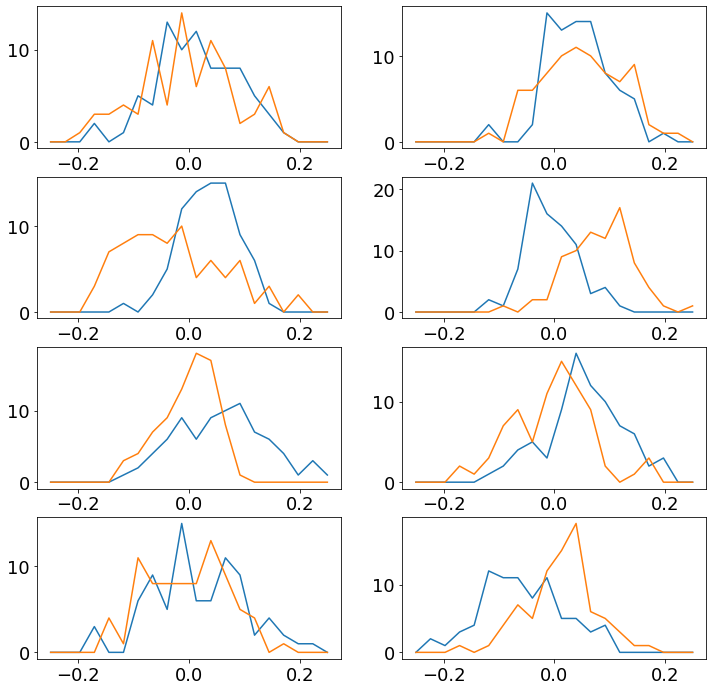

In [67]:
xbin = np.linspace(-0.25,0.25,20)
xbin_edges = np.append(xbin,xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2
fig,axs = plt.subplots(4,2)
for j in range(4):
    pdf1 = np.histogram(vT[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vT[j,80:],bins=xbin_edges)[0]
    axs[j,0].plot(xbin,pdf1)
    axs[j,0].plot(xbin,pdf2)
    
    pdf1 = np.histogram(vT2[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vT2[j,80:],bins=xbin_edges)[0]
    axs[j,1].plot(xbin,pdf1)
    axs[j,1].plot(xbin,pdf2)

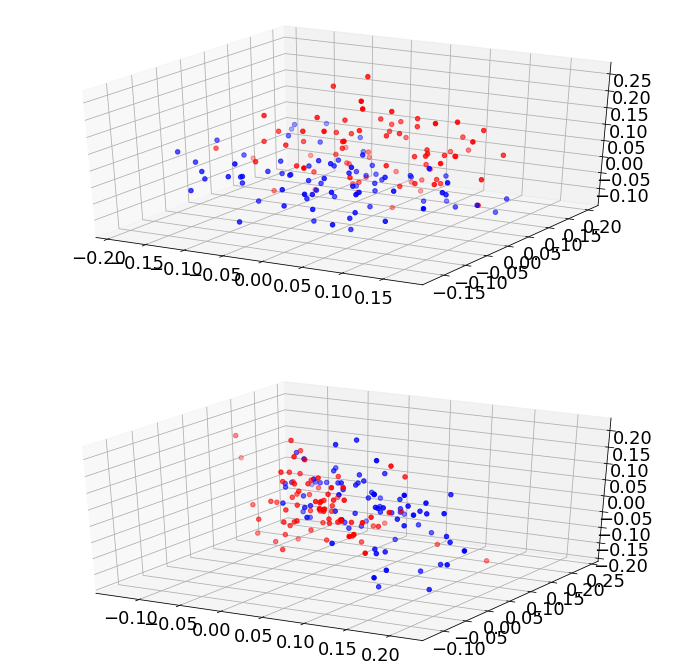

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(vT[0,:80],vT[1,:80],vT[2,:80],c='r',marker='o',s=20)
ax1.scatter(vT[0,80:],vT[1,80:],vT[2,80:],c='b',marker='o',s=20)

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(vT2[0,:80],vT2[1,:80],vT2[2,:80],c='r',marker='o',s=20)
ax2.scatter(vT2[0,80:],vT2[1,80:],vT2[2,80:],c='b',marker='o',s=20)

plt.show()

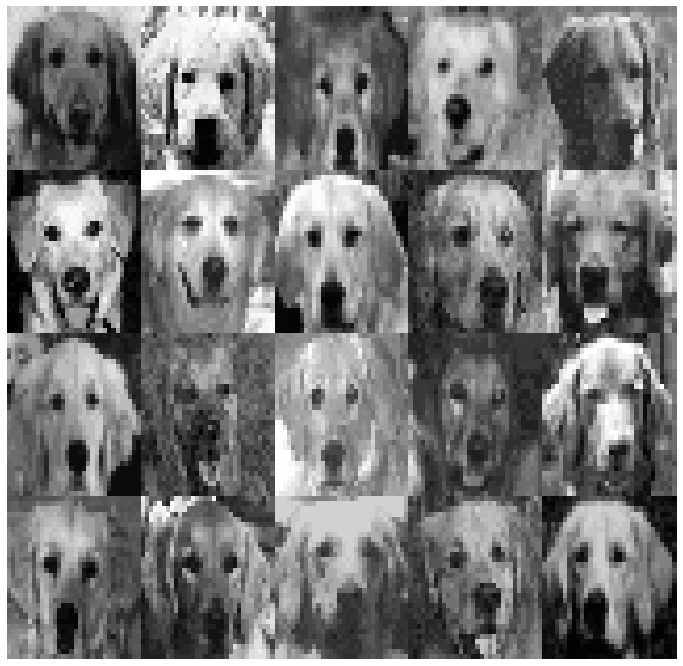

In [74]:
master = np.zeros((32*5,32*4))
count = 0

for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(dog[:,count],(64,64)))
        T = T2[::2,::2]
        master[32*j:32*(j+1),32*jj:32*(jj+1)] = T
        count += 1
        
plt.figure()
plt.pcolor(np.rot90(master),cmap='gray')
plt.axis('off')
plt.show()

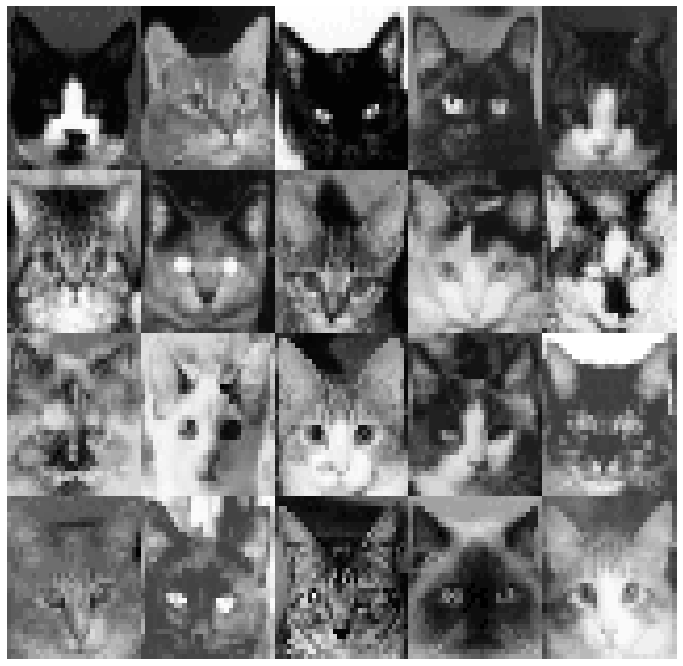

In [75]:
master = np.zeros((32*5,32*4))
count = 0

for jj in range(4):
    for j in range(5):
        T2 = np.flipud(np.reshape(cat[:,count],(64,64)))
        T = T2[::2,::2]
        master[32*j:32*(j+1),32*jj:32*(jj+1)] = T
        count += 1
        
plt.figure()
plt.pcolor(np.rot90(master),cmap='gray')
plt.axis('off')
plt.show()